Book Rating Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip uninstall -y numpy gensim thinc

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3


In [3]:
!which python
!which pip
!python --version
!pip --version

/usr/local/bin/python
/usr/local/bin/pip
Python 3.11.12
pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [4]:
!pip uninstall -y numpy

In [5]:
!pip install numpy --upgrade --force-reinstall

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.5 requires thinc<8.4.0,>=8.3.4, which is not installed.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [6]:
!pip install --force-reinstall --no-cache-dir gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 182.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 185.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 180.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 216.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully 

In [7]:
!pip install contractions
!pip install wordcloud gensim
from wordcloud import WordCloud
import gensim.downloader as api

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
from wordcloud import WordCloud
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

Load The Dataset

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence & Machine Learning/Book_review.csv')
df.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


Clean The Text

In [10]:
df.tail()

,Unnamed: 0,rating,reviewText,summary
11995,11995,2,Had to read certain passages twice--typos. Wi...,Where's the meat?
11996,11996,3,Not what i expected. yet a very interesting bo...,Interesting
11997,11997,5,Dragon Knights is a world where Knights ride d...,"Dragon Knights, Wings of Change (I Dream of Dr..."
11998,11998,4,"Since this story is very short, it's hard to s...","Good writing, short story"
11999,11999,4,from 1922 an amazing collection of info on sym...,interesting public domain book


In [11]:
df.shape

(12000, 4)

In [12]:
df.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

In [13]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.head()

,rating,reviewText,summary
0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [15]:
df['rating'].unique()

array([5, 1, 4, 3, 2])

In [16]:
df['reviewText'].duplicated()

,reviewText
0,False
1,False
2,False
3,False
4,False
...,...
11995,False
11996,False
11997,False
11998,False


<ipython-input-17-b07152d0b03b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


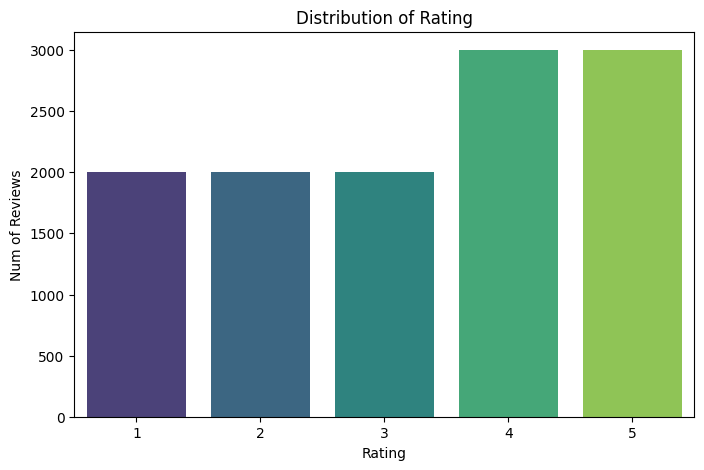

In [17]:
# Vizualizing the distribution of rating
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Num of Reviews")
plt.show()

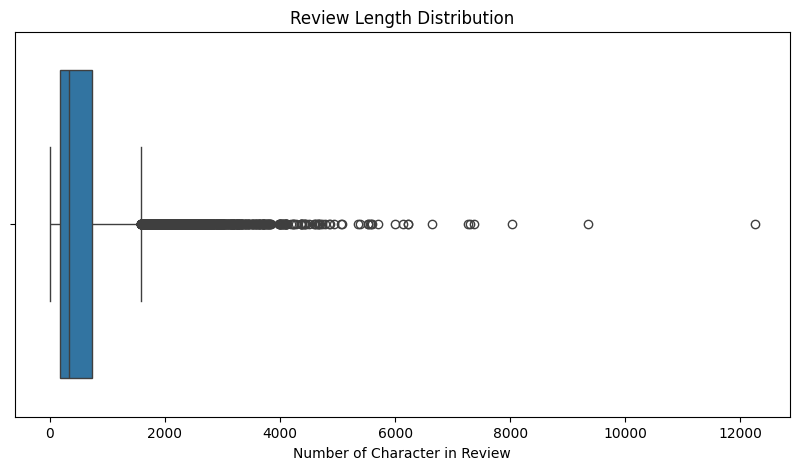

In [18]:
# Visualizing the distribution of Review Length
df['reviewLength'] = df['reviewText'].astype(str).apply(len)

plt.figure(figsize=(10, 5))
plt.title("Review Length Distribution")
plt.xlabel("Number of Character in Review")
sns.boxplot(x=df['reviewLength'])
plt.show()

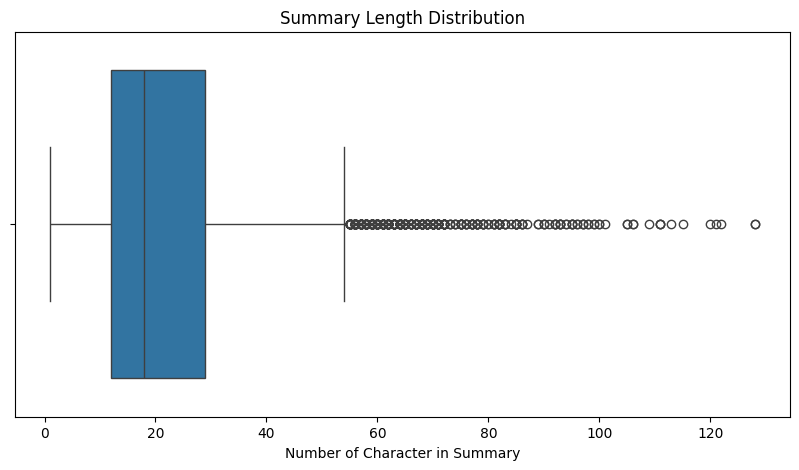

In [19]:
# Visualizing the distribution of Summaray Length
df['summaryLength'] = df['summary'].astype(str).apply(len)

plt.figure(figsize=(10, 5))
plt.title("Summary Length Distribution")
plt.xlabel("Number of Character in Summary")
sns.boxplot(x=df['summaryLength'])
plt.show()

In [20]:
df.isnull().sum()

,0
rating,0
reviewText,0
summary,2
reviewLength,0
summaryLength,0


In [21]:
df['summary'] =df['summary'].fillna("No Summary Provided")

In [22]:
df.isnull().sum()

,0
rating,0
reviewText,0
summary,0
reviewLength,0
summaryLength,0


In [23]:
df.describe()

,rating,reviewLength,summaryLength
count,12000.000000,12000.000000,12000.000000
mean,3.250000,601.562750,22.225833
std,1.421619,710.158377,14.958910
min,1.000000,7.000000,1.000000
25%,2.000000,170.750000,12.000000
50%,3.500000,332.000000,18.000000
75%,4.250000,737.000000,29.000000
max,5.000000,12246.000000,128.000000


In [24]:
# Upsampling
df_1 = df[df['rating'] == 1]
df_2 = df[df['rating'] == 2]
df_3 = df[df['rating'] == 3]
df_4 = df[df['rating'] == 4]
df_5 = df[df['rating'] == 5]

df1_upSampling = resample(df_1, replace=True, n_samples=3000, random_state=42)
df2_upSampling = resample(df_2, replace=True, n_samples=3000, random_state=42)
df3_upSampling = resample(df_3, replace=True, n_samples=3000, random_state=42)

balanced_df = pd.concat([df1_upSampling,df2_upSampling,df3_upSampling,df_4,df_5])

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

<ipython-input-25-168d1ed2d852>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='rating', palette='plasma')


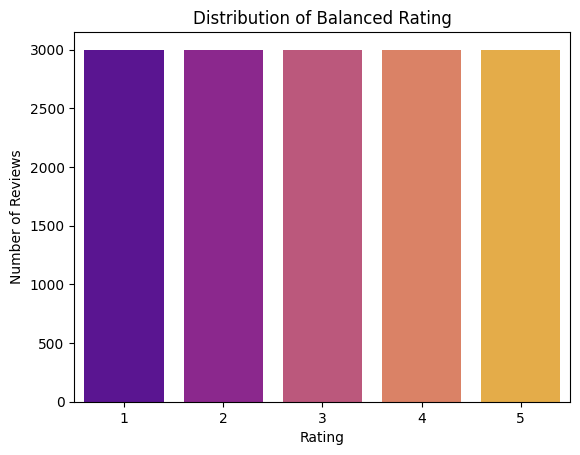

In [25]:
sns.countplot(data=balanced_df, x='rating', palette='plasma')
plt.title("Distribution of Balanced Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [26]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [27]:
stop_Words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [28]:
def cleanReview(text):
    if pd.isnull(text):
        return ""

    text = text.lower()
    text = contractions.fix(text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#\w+|\d+", '', text)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)

    words = nltk.word_tokenize(text)

    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_Words]

    return " ".join(words)

df['cleanedReviewText'] = df['reviewText'].apply(cleanReview)

Visualize the Cleaned Data

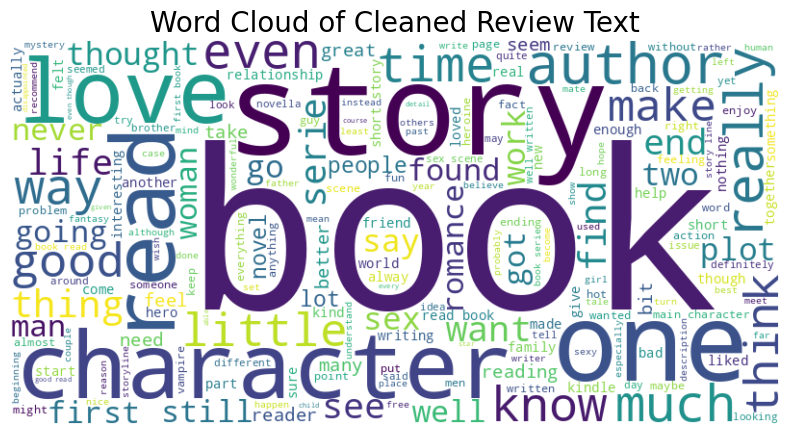

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df['cleanedReviewText'])

word_Cloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Review Text', fontsize=20)
plt.show()

In [30]:
from collections import Counter

all_Words = " ".join(df['cleanedReviewText']).split()
word_Freq = Counter(all_Words)

common_Words = word_Freq.most_common(20)
words, counts = zip(*common_Words)

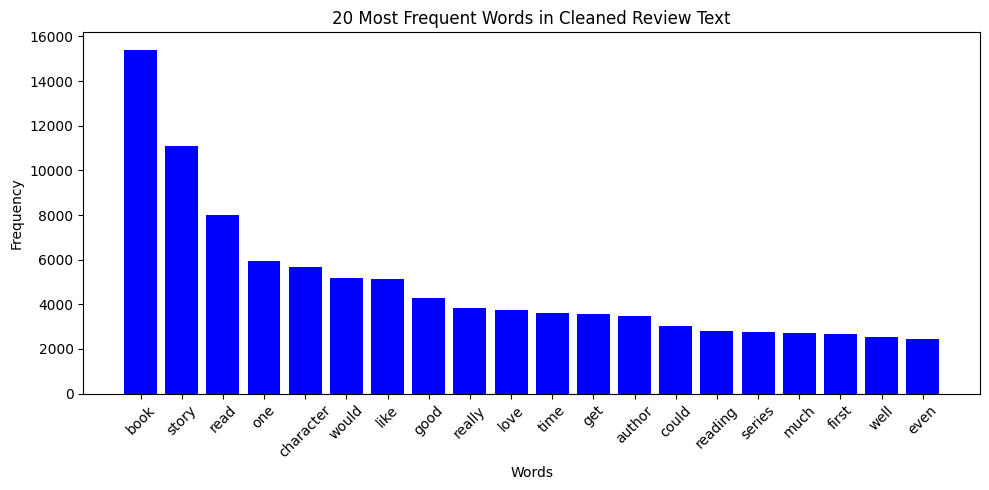

In [31]:
plt.figure(figsize=(10,5))
plt.title("20 Most Frequent Words in Cleaned Review Text")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.bar(words, counts, color='blue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tokenization and Padding

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import SimpleRNN

In [33]:
features = df['cleanedReviewText']
target = df['rating'].values - 1

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [34]:
maxWords = 10000
tokenizer = Tokenizer(num_words=maxWords)
tokenizer.fit_on_texts(X_train)
X_trainSeq = tokenizer.texts_to_sequences(X_train)
X_testSeq = tokenizer.texts_to_sequences(X_test)

In [35]:
sequence_lengths = [len(seq) for seq in X_trainSeq]
maxLength = int(np.percentile(sequence_lengths, 95))

In [36]:
X_train_pad = pad_sequences(X_trainSeq, maxlen=maxLength)
X_test_pad = pad_sequences(X_testSeq, maxlen=maxLength)

In [37]:
numClasses = 5
y_trainCat = to_categorical(y_train, numClasses)
y_testCat = to_categorical(y_test, numClasses)

In [38]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=maxWords, output_dim=128, input_length=maxLength))
model_rnn.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(numClasses, activation='softmax'))
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
# Training Model 1
historyRnn = model_rnn.fit(X_train_pad, y_trainCat, batch_size=64, epochs=15, validation_split=0.1, callbacks=[earlyStopping])

# Evaluating Model 1
loss, accuracy = model_rnn.evaluate(X_test_pad, y_testCat)
print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2186 - loss: 1.6651 - val_accuracy: 0.2604 - val_loss: 1.5846
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2667 - loss: 1.5929 - val_accuracy: 0.2927 - val_loss: 1.5745
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2762 - loss: 1.5784 - val_accuracy: 0.2583 - val_loss: 1.5585
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3120 - loss: 1.5275 - val_accuracy: 0.3229 - val_loss: 1.5385
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3659 - loss: 1.4770 - val_accuracy: 0.2750 - val_loss: 1.5597
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4169 - loss: 1.4103 - val_accuracy: 0.2927 - val_loss: 1.5381
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4461 - loss: 1.3623 - val_accuracy: 0.3115 - val_loss: 1.5162
Epoch 8/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4802 - loss: 1.3063 - val_accu

In [41]:
# Model 2
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=maxWords, output_dim=128, input_length=maxLength))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(numClasses, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model 2
historyLstm = model_lstm.fit(X_train_pad, y_trainCat, batch_size=64, epochs=15, validation_split=0.1, callbacks=[earlyStopping])

Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 50s 311ms/step - accuracy: 0.2881 - loss: 1.5248 - val_accuracy: 0.4354 - val_loss: 1.2589
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 75s 299ms/step - accuracy: 0.5016 - loss: 1.1028 - val_accuracy: 0.4573 - val_loss: 1.2438
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - accuracy: 0.6155 - loss: 0.9220 - val_accuracy: 0.4688 - val_loss: 1.3259
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - accuracy: 0.7097 - loss: 0.7357 - val_accuracy: 0.4354 - val_loss: 1.4246
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - accuracy: 0.7836 - loss: 0.5845 - val_accuracy: 0.4229 - val_loss: 1.6704
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - accuracy: 0.8264 - loss: 0.4719 - val_accuracy: 0.4281 - val_loss: 1.8325
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - accuracy: 0.8777 - loss: 0.3581 - val_accuracy: 0.4427 - val_loss: 1.9833


In [42]:
import numpy
import gensim.downloader as api

In [43]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 135.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00


In [44]:
import gradio as gr

In [45]:
# Model 3
word2vec = api.load('glove-wiki-gigaword-50')
embeddingDim = 50
embeddingMatrix = np.zeros((maxWords, embeddingDim))
for word, i in tokenizer.word_index.items():
    if i < maxWords:
        if word in word2vec:
            embeddingMatrix[i] = word2vec[word]

model_lstm_w2v = Sequential()
model_lstm_w2v.add(Embedding(input_dim=maxWords, output_dim=embeddingDim, input_length=maxLength, weights=[embeddingMatrix], trainable=False))
model_lstm_w2v.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm_w2v.add(Dense(numClasses, activation='softmax'))
model_lstm_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model 3
historyLstmW2v = model_lstm_w2v.fit(X_train_pad, y_trainCat, batch_size=64, epochs=15, validation_split=0.1, callbacks=[earlyStopping])

[==================================================] 100.0% 66.0/66.0MB downloaded
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 255ms/step - accuracy: 0.2918 - loss: 1.5617 - val_accuracy: 0.3583 - val_loss: 1.4360
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.3515 - loss: 1.4545 - val_accuracy: 0.4031 - val_loss: 1.3890
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.3790 - loss: 1.4245 - val_accuracy: 0.4219 - val_loss: 1.3581
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 32s 239ms/step - accuracy: 0.3924 - loss: 1.3978 - val_accuracy: 0.4000 - val_loss: 1.3654
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 34s 250ms/step - accuracy: 0.3945 - loss: 1.3713 - val_accuracy: 0.4115 - val_loss: 1.3400
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 246ms/step - accuracy: 0.4169 - loss: 1.3435 - val_accuracy: 0.4396 - val_loss: 1.3160
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 33s 245ms/step - accuracy: 0.4318 - loss: 1.3186 - val_accuracy: 0.4302 - val_loss: 1.3397
Epoch 8/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 258ms/step - accuracy: 0.4391 - loss: 1.3005 - val

In [46]:
def evaluate_model(model, X_test_pad, y_test_cat, y_test, name):
    loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
    print(f"{name} Test accuracy: {accuracy*100:.2f}%")

    y_pred = model.predict(X_test_pad)
    y_predClasses = np.argmax(y_pred, axis=1)

    confusionMatrix = confusion_matrix(y_test, y_predClasses)
    print(f"{name} Confusion Matrix:")
    print(confusionMatrix)

    report = classification_report(y_test, y_predClasses)
    print(f"{name} Classification Report:")
    print(report)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2914 - loss: 1.5145
Simple RNN Test accuracy: 30.58%
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Simple RNN Confusion Matrix:
[[102  44  88 110  61]
 [ 55  66  82 118  73]
 [ 44  35  85 140 108]
 [ 43  26 103 238 177]
 [ 24  24  72 239 243]]
Simple RNN Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.25      0.30       405
           1       0.34      0.17      0.22       394
           2       0.20      0.21      0.20       412
           3       0.28      0.41      0.33       587
           4       0.37      0.40      0.38       602

    accuracy                           0.31      2400
   macro avg       0.31      0.29      0.29      2400
weighted avg       0.31      0.31      0.30      2400

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4627 - loss: 1.1983
LSTM Test accuracy: 47.04%
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step
LSTM Confusion Matrix:
[[220 112  17  22  34]

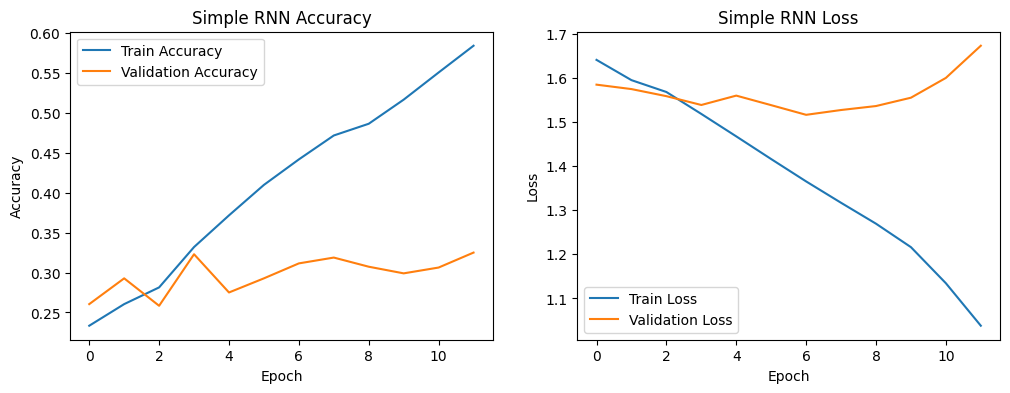

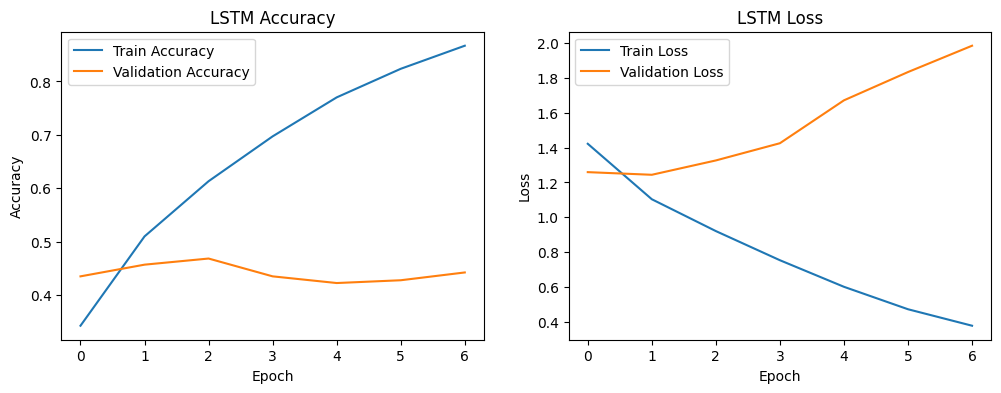

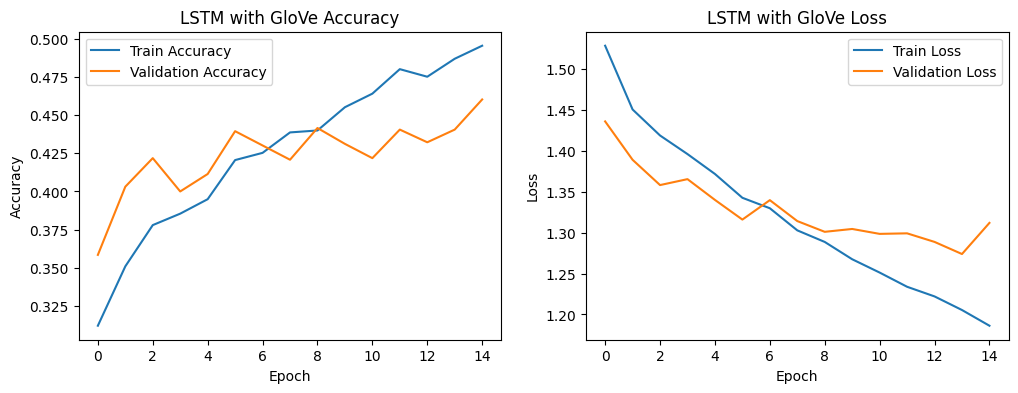

In [48]:
# Evaluating all the models
evaluate_model(model_rnn, X_test_pad, y_testCat, y_test, "Simple RNN")
evaluate_model(model_lstm, X_test_pad, y_testCat, y_test, "LSTM")
evaluate_model(model_lstm_w2v, X_test_pad, y_testCat, y_test, "LSTM with GloVe")

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_history(historyRnn, 'Simple RNN')
plot_history(historyLstm, 'LSTM')
plot_history(historyLstmW2v, 'LSTM with GloVe')

In [49]:
def predict_sentiment(text, model):
    cleanedText = cleanReview(text)
    seq = tokenizer.texts_to_sequences([cleanedText])
    padded = pad_sequences(seq, maxlen=maxLength)
    pred = model.predict(padded)
    s = np.argmax(pred, axis=1)[0] + 1
    return f"Predicted rating: {s}"

interface = gr.Interface(fn=lambda text: predict_sentiment(text, model_lstm), inputs="text", outputs="text", title="Book Review Rating Prediction")
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7306bcaff437b3f11c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [50]:
df.head()

,rating,reviewText,summary,reviewLength,summaryLength,cleanedReviewText
0,5,This book was the very first bookmobile book I...,50 + years ago...,298,17,book first bookmobile book bought school book ...
1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,2077,23,read description book could wait read download...
2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,2439,31,edit review book believe got right updated rew...
3,5,I don't normally buy 'mystery' novels because ...,Very good read.,367,15,normally buy mystery novel like however time d...
4,5,"This isn't the kind of book I normally read, a...",Great Story!,389,12,kind book normally read although try limit cer...
